In [37]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
# load dataset
data=pd.read_csv("eda_data.csv")

In [38]:
# inspect the data
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [40]:
data.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,214.341239,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,185.250000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [84]:
data.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

In [41]:
# Drop all rows with "Unknown" or -1 as entries in the column Size
df = data[(data['Size'] != 'Unknown') & (data['Size'] != '-1')]

C:\Users\garre\AppData\Local\Temp\ipykernel_3120\2773631247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = data['Size'].astype(str)


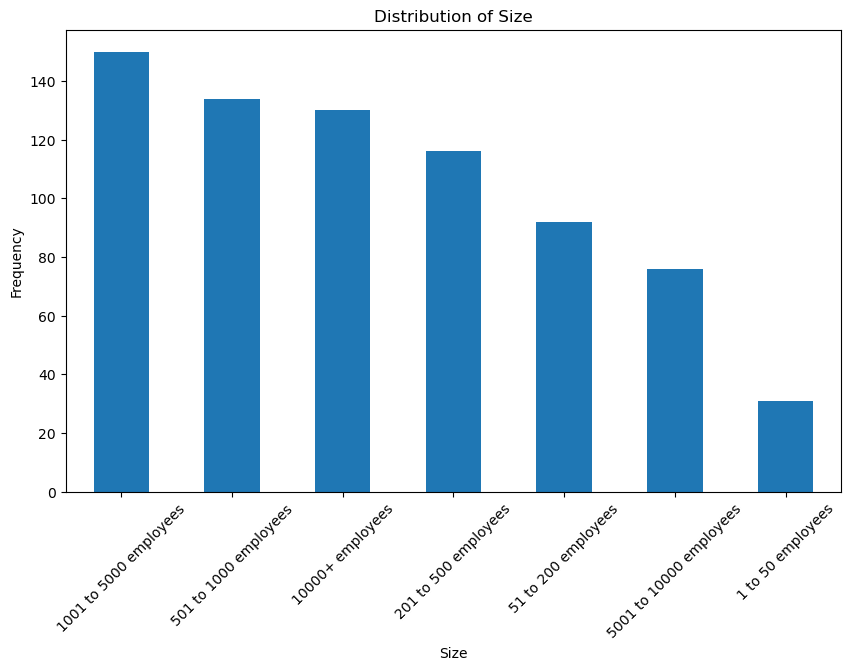

In [64]:
# Convert the 'size' column to string type
df['Size'] = data['Size'].astype(str)

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

# Suppress specific warnings from Pandas
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Plot the distribution of 'size' column
plt.figure(figsize=(10, 6))
df['Size'].value_counts().plot(kind='bar')
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

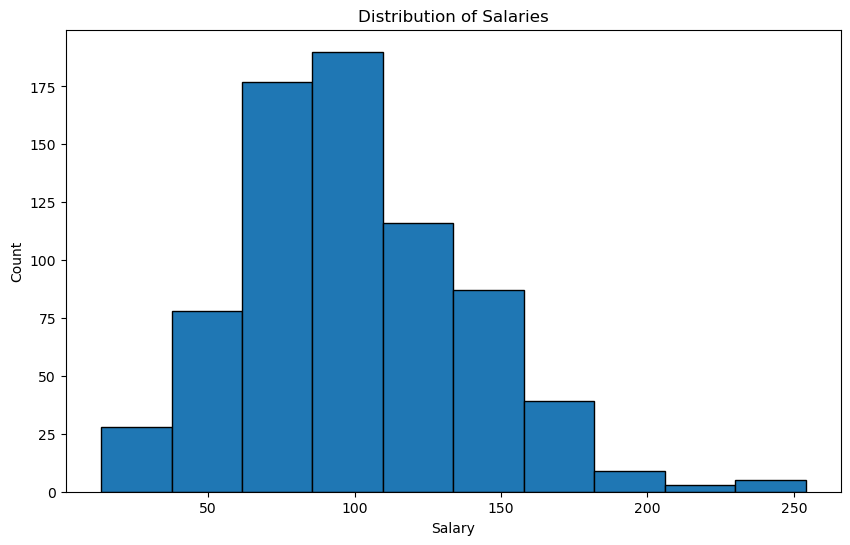

In [58]:
# Plot the histogram for the 'Salary' column
plt.figure(figsize=(10, 6))
df['avg_salary'].dropna().astype(float).plot(kind='hist', bins=10, edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

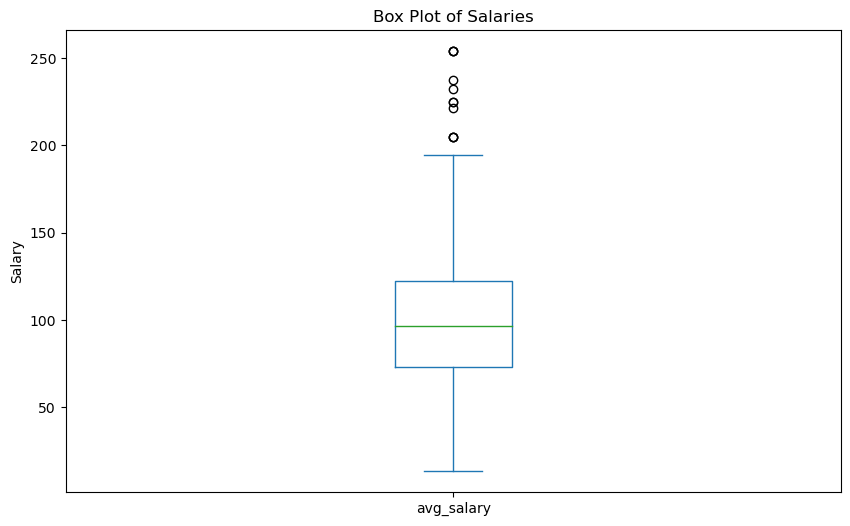

In [43]:
# Plot a box plot for the 'Salary' column
plt.figure(figsize=(10, 6))
df['avg_salary'].dropna().astype(float).plot(kind='box')
plt.title('Box Plot of Salaries')
plt.ylabel('Salary')
plt.show()

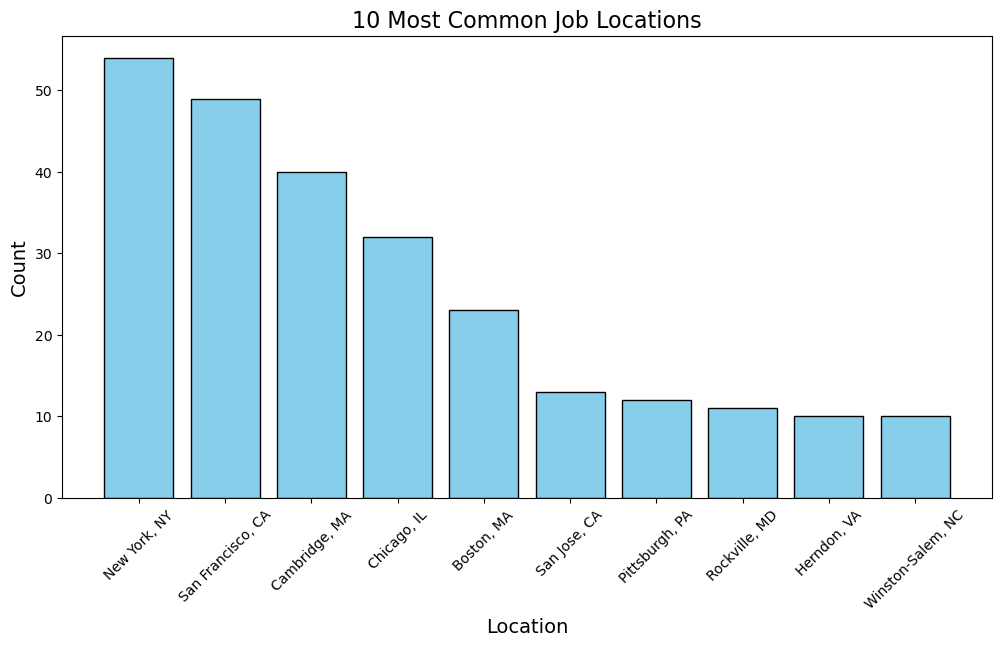

In [44]:
#Histogram of the most common locations
most_common_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(most_common_locations.index, most_common_locations.values, color='skyblue', edgecolor='black')
plt.title('10 Most Common Job Locations', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

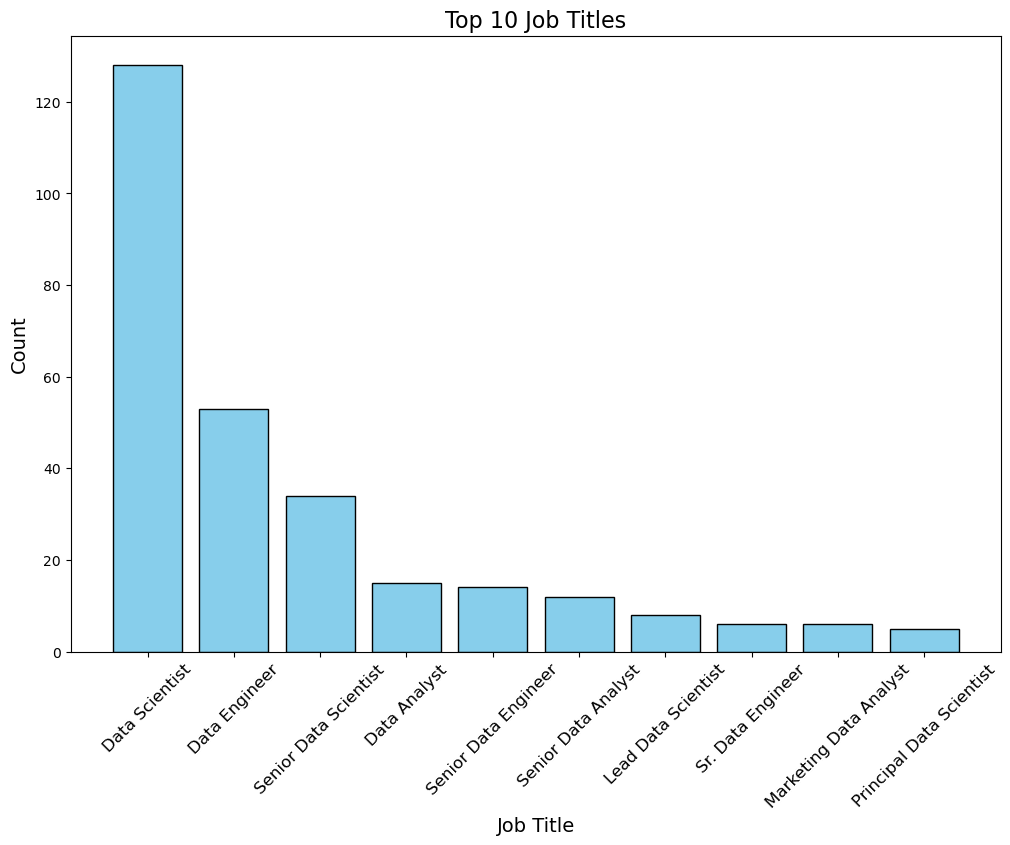

In [45]:
# Create a variable to show the most common job title's in the dataset
top_job_titles = df['Job Title'].value_counts().head(10)

# Create the bar plot for the most common job titles
plt.figure(figsize=(12, 8))
plt.bar(top_job_titles.index, top_job_titles.values, color='skyblue', edgecolor='black')
plt.title('Top 10 Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

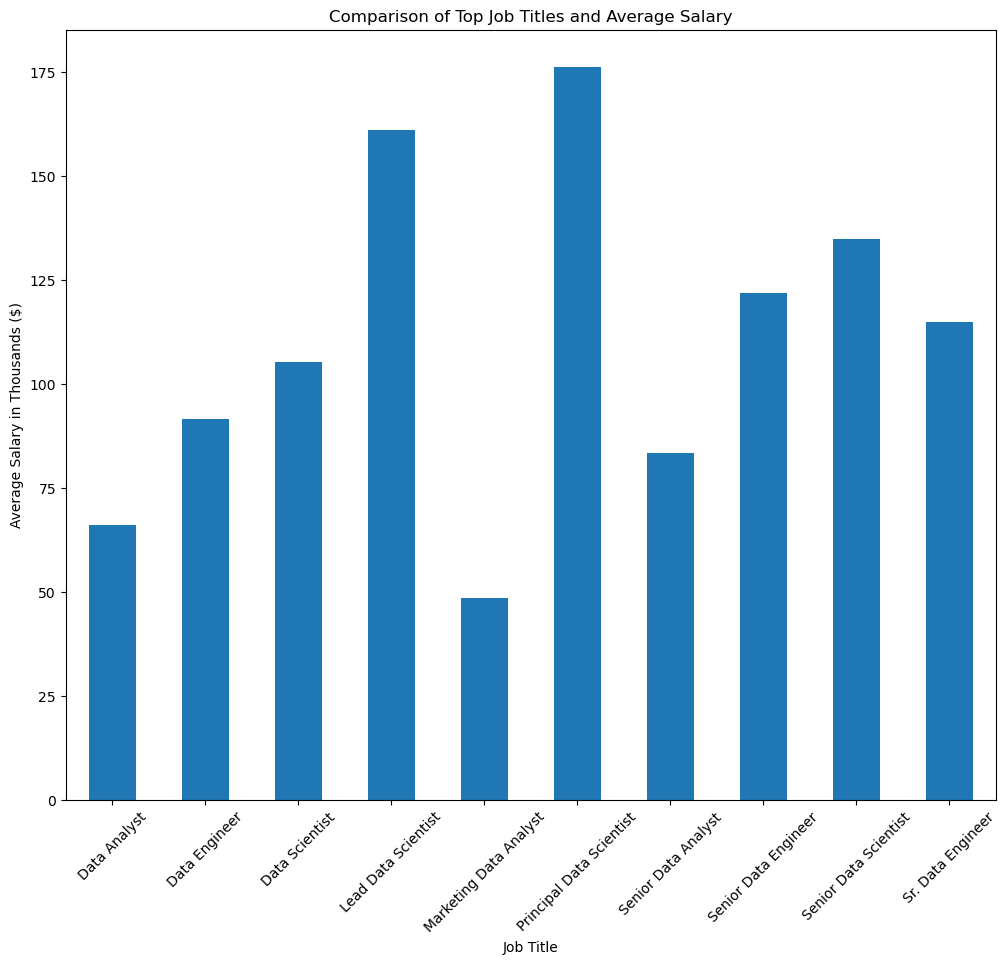

In [61]:
# Define and list the top job titles
top_job_titles = ['Data Scientist', 'Data Engineer', 'Senior Data Scientist', 'Data Analyst', 'Senior Data Engineer', 'Senior Data Analyst', 'Lead Data Scientist', 'Sr. Data Engineer', 'Marketing Data Analyst', 'Principal Data Scientist']

# Filter the DataFrame to include only the top job titles
filtered_df = df[df['Job Title'].isin(top_job_titles)]

# Calculate the average salary for each of the top job titles
avg_salary_by_title = filtered_df.groupby('Job Title')['avg_salary'].mean()

# Plot the relationship between the top job titles and average salary
plt.figure(figsize=(12, 10))
avg_salary_by_title.plot(kind='bar')
plt.title('Comparison of Top Job Titles and Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in Thousands ($)')
plt.xticks(rotation=45)
plt.show()

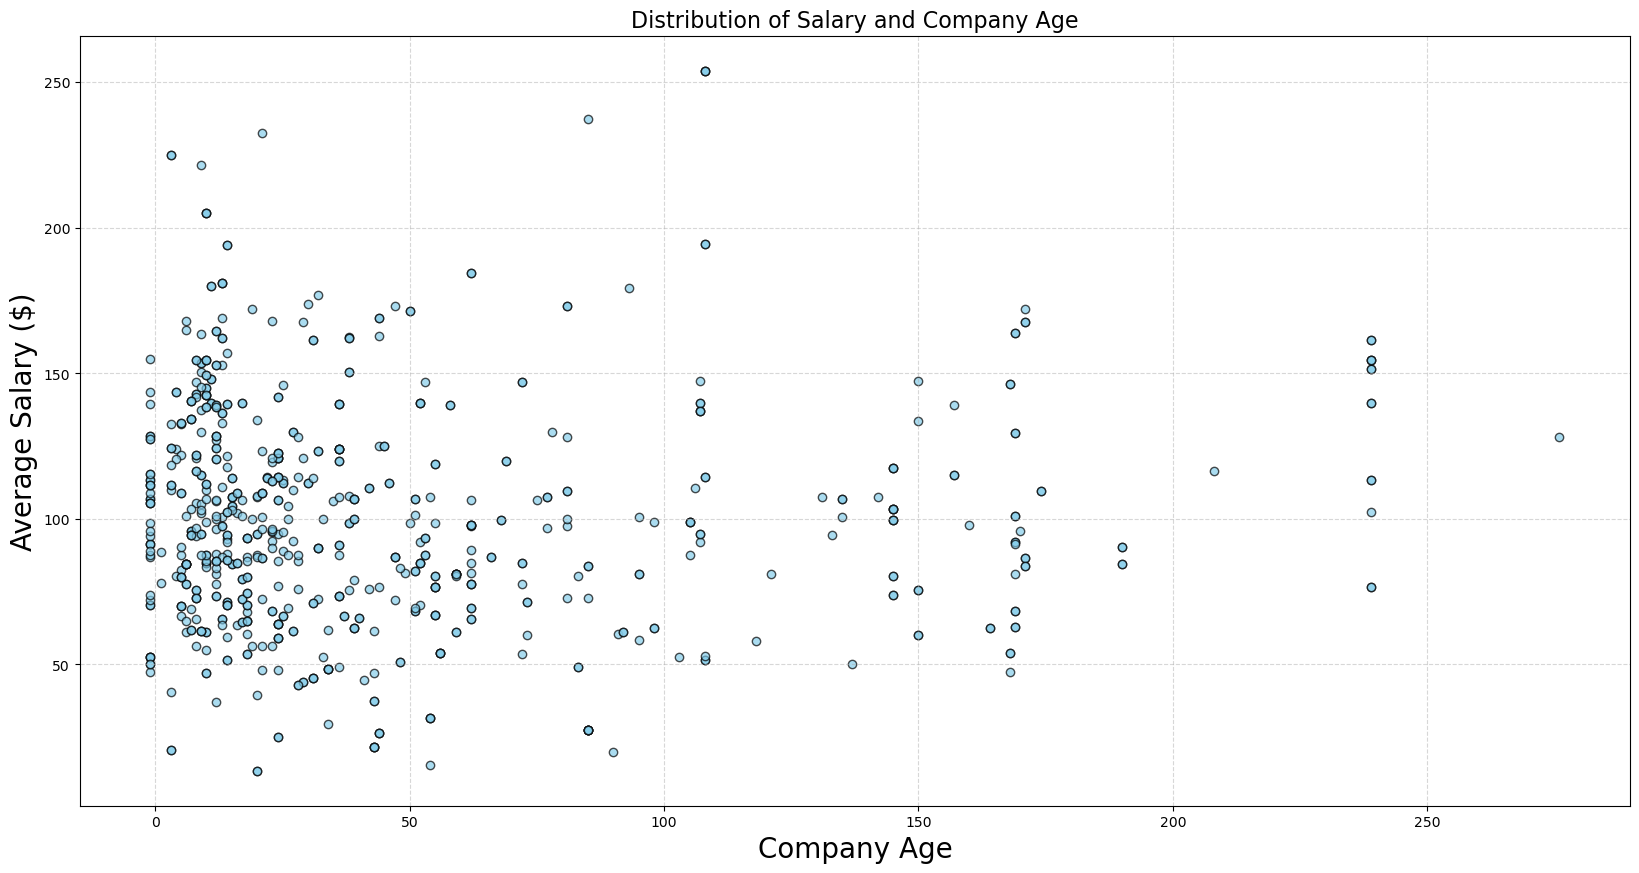

In [48]:
# Scatter plot to show the distributin of one's salary compared to their company's age
plt.figure(figsize=(20, 10))
plt.scatter(df['age'], df['avg_salary'], alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Salary and Company Age', fontsize=16)
plt.xlabel('Company Age', fontsize=20)
plt.ylabel('Average Salary ($)', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [62]:
# Replace all -1 values in the 'Rating' column with NaN
df['Rating'].replace(-1, pd.NA, inplace=True)

# Drop all rows with NaN values in the 'Rating' column
df.dropna(subset=['Rating'], inplace=True)

# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_jobs_dataset.csv', index=False)

C:\Users\garre\AppData\Local\Temp\ipykernel_3120\3778198430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'].replace(-1, pd.NA, inplace=True)
C:\Users\garre\AppData\Local\Temp\ipykernel_3120\3778198430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Rating'], inplace=True)


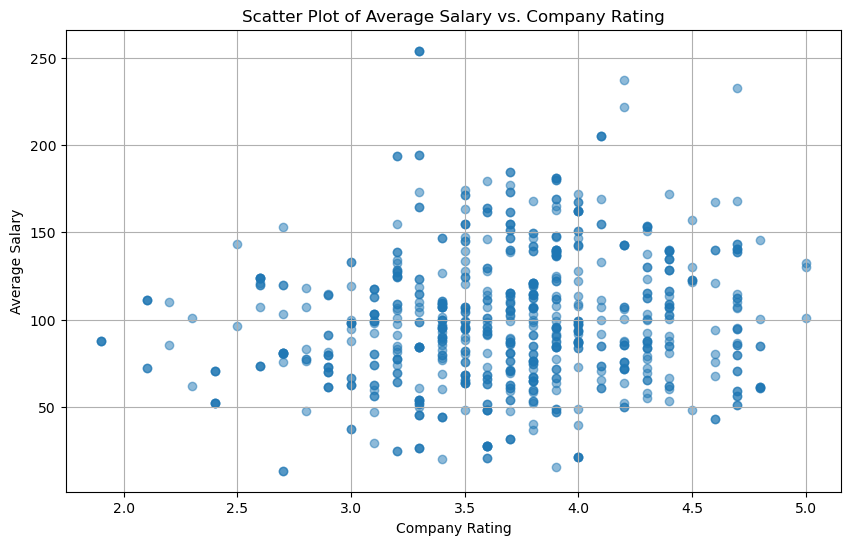

In [18]:
# Scatter plot: Average Salary vs. Company Rating
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['avg_salary'], alpha=0.5)
plt.title('Scatter Plot of Average Salary vs. Company Rating')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

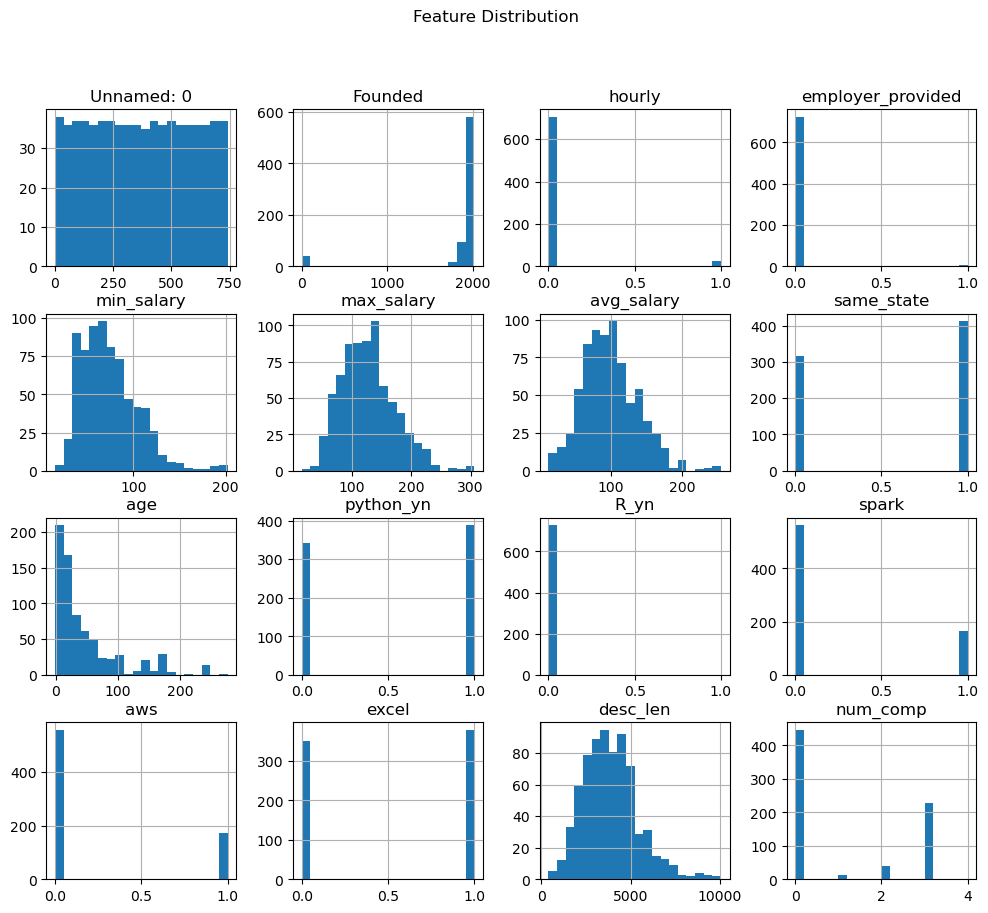

In [65]:
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distribution")
plt.show()

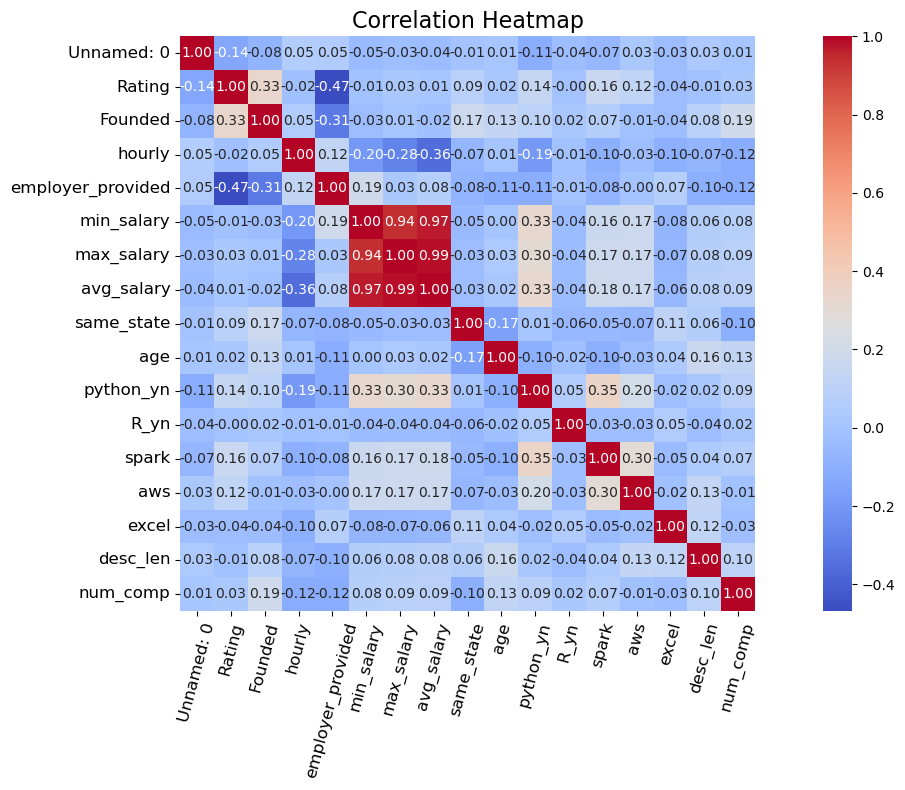

In [16]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=75, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

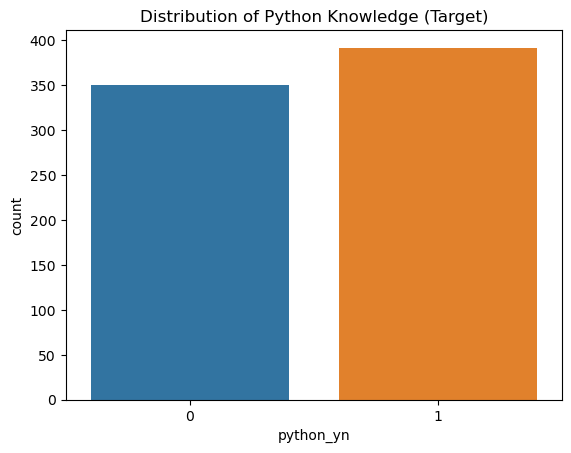

In [49]:
# Plot the distribution of the target variable for classification and Regression
sns.countplot(x='python_yn', data=data)
plt.title("Distribution of Python Knowledge")
plt.show()

In [52]:
# Select features and target variable
# For example, let's predict 'Average Salary' based on 'Rating', 'Size', and 'Job Title'
X = df[['Rating','Job Title']]
y = df['avg_salary']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2_score1=r2_score(y_pred, y_test) #score should be between 0 and 1, this did not understand the data
print("Mean Squared Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2_score1)

Mean Squared Error 2.187099833060984e+28
Mean Absolute Error 21550233726451.105
R2 Score -0.010015205303753438


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset from a local file
df = pd.read_csv('cleaned_data.csv')

# Preprocess the data
df.replace(-1, pd.NA, inplace=True)
df.dropna(inplace=True)

# Select features and target variable
# For example, let's predict 'avg_salary' based on 'Rating', 'Size', 'Founded', 'Industry', 'Sector', 'Revenue'
X = df[['Rating', 'Size', 'Founded', 'Industry', 'Sector', 'Revenue']]
y = df['avg_salary']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2_score1=r2_score(y_pred, y_test) #score should be between 0 and 1, this did not understand the data
print("Mean Squared Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2_score1)

Mean Squared Error 5.832057923159594e+28
Mean Absolute Error 48849437533307.01
R2 Score -0.030919328756075837
